# Projeto Final

## Parte 1

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.utils import shuffle

### Cria dataframe com apenas os atributos "category", "type" e "value"

In [2]:
df = pd.read_csv('./misp.csv', delimiter=',', nrows = None)
df.dataframeName = 'misp.csv'

df_chosen = df[['category', 'type', 'value']].copy()
df_chosen

,category,type,value
0,Network activity,url,http://api.holycrossservices.info/dri/donate.php
1,Network activity,ip-dst,176.103.56.36
2,Network activity,hostname,api.holycrossservices.info
3,Network activity,url,http://api.holycrossservices.net/dri/donate.php
4,Network activity,hostname,api.holycrossservices.org
...,...,...,...
138719,Network activity,domain,rimpro.ru
138720,Network activity,domain,techboss.net
138721,Network activity,domain,tommylam.com
138722,Network activity,domain,trudprom.ru


### Mapeia strings de categorias para indices inteiros

In [3]:
d = dict([(y,x+1) for x,y in enumerate(sorted(set(list(df_chosen['category'].unique()))))])
df_chosen['category_index'] = df['category'].map(d)
d

{'Antivirus detection': 1,
 'Artifacts dropped': 2,
 'Attribution': 3,
 'External analysis': 4,
 'Financial fraud': 5,
 'Internal reference': 6,
 'Network activity': 7,
 'Other': 8,
 'Payload delivery': 9,
 'Payload installation': 10,
 'Payload type': 11,
 'Persistence mechanism': 12,
 'Targeting data': 13}

### Mapeia string de tipos para indices inteiros

In [4]:
d = dict([(y,x+1) for x,y in enumerate(sorted(set(list(df_chosen['type'].unique()))))])
df_chosen['type_index'] = df['type'].map(d)
d

{'AS': 1,
 'attachment': 2,
 'btc': 3,
 'campaign-id': 4,
 'campaign-name': 5,
 'comment': 6,
 'domain': 7,
 'domain|ip': 8,
 'email-attachment': 9,
 'email-dst': 10,
 'email-src': 11,
 'email-subject': 12,
 'filename': 13,
 'filename|md5': 14,
 'filename|sha1': 15,
 'filename|sha256': 16,
 'hostname': 17,
 'imphash': 18,
 'ip-dst': 19,
 'ip-src': 20,
 'link': 21,
 'malware-sample': 22,
 'md5': 23,
 'mutex': 24,
 'named pipe': 25,
 'other': 26,
 'pattern-in-file': 27,
 'pattern-in-memory': 28,
 'pattern-in-traffic': 29,
 'pdb': 30,
 'pehash': 31,
 'prtn': 32,
 'regkey': 33,
 'regkey|value': 34,
 'sha1': 35,
 'sha256': 36,
 'snort': 37,
 'ssdeep': 38,
 'target-location': 39,
 'target-machine': 40,
 'target-org': 41,
 'target-user': 42,
 'text': 43,
 'threat-actor': 44,
 'uri': 45,
 'url': 46,
 'user-agent': 47,
 'vulnerability': 48,
 'whois-creation-date': 49,
 'whois-registrant-email': 50,
 'whois-registrant-name': 51,
 'whois-registrant-phone': 52,
 'whois-registrar': 53,
 'windows-sc

### Cria dataframe apenas com indices das categorias e dos tipos

In [5]:
df_selected = df_chosen[['category_index', 'type_index']].copy()
df_selected

,category_index,type_index
0,7,46
1,7,19
2,7,17
3,7,46
4,7,17
...,...,...
138719,7,7
138720,7,7
138721,7,7
138722,7,7


### Separa o dataset nas porções 80/20

In [6]:
df_shuffle = shuffle(df_selected, random_state=None).reset_index(drop=True)

int_80 = int(df_shuffle.shape[0] * 0.8)

df_80 = df_shuffle.loc[:int_80, :]
df_20 = df_shuffle.loc[int_80:, :]

## Parte 2

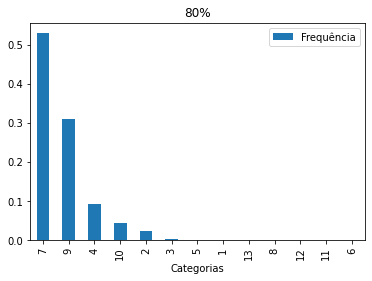

In [7]:
plot_df_80 = pd.DataFrame({
    'Categorias': df_80['category_index'].unique(),
    'Frequência': df_80['category_index'].value_counts(normalize=True)
})
plot_df_80.plot(x ='Categorias', y='Frequência', kind = 'bar', title='80%')

plt.show()

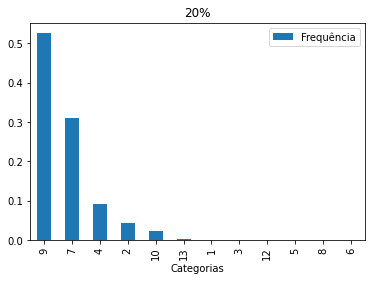

In [8]:
plot_df_20 = pd.DataFrame({
    'Categorias': df_20['category_index'].unique(),
    'Frequência': df_20['category_index'].value_counts(normalize=True)
})
plot_df_20.plot(x ='Categorias', y='Frequência', kind = 'bar', title='20%')

plt.show()

## Parte 3

## KNN

In [9]:
df_80['category_index'].value_counts()

7     58789
9     34293
4     10235
2      4717
10     2436
3       228
1       136
13       65
8        36
5        22
12       13
6         8
11        2
Name: category_index, dtype: int64

In [10]:
## for bag-of-words
from sklearn import feature_extraction, model_selection, naive_bayes, pipeline, manifold, preprocessing
from sklearn.model_selection import train_test_split
from sklearn.feature_extraction.text import TfidfVectorizer

from sklearn.metrics import mean_squared_error

### Separando o conjunto de dados de treinamento e teste, sendo 80% para treino e 20% para teste

In [11]:
X_train, X_test, y_train, y_test = train_test_split(df_80.drop('category_index',axis=1),df_80['category_index'], test_size=0.2)

### Executando o KNN, o método predict tenta prever os valores para os dados de teste

In [12]:
from sklearn.neighbors import KNeighborsClassifier

# Definindo o número de vizinhos.
knn = KNeighborsClassifier(n_neighbors=5)
model = knn.fit(X_train, y_train)
resultado = model.predict(X_test)
resultado

array([9, 9, 7, ..., 9, 4, 7], dtype=int64)

### Cria matriz de confusão

Exemplo: dos 27 valores que o modelo previu como sendo da categoria 1, todos os 27 foram classificados corretamente

In [13]:
print (pd.crosstab(y_test,resultado, rownames=['Real'], colnames=['Predito'], margins=True))

Predito   1   2   3     4  5      7  8     9  12  13    All
Real                                                       
1        32   0   0     0  0      0  0     0   0   0     32
2         0  46   0     0  0      1  0   868   2   0    917
3        14   0  43     2  0      0  0     0   0   0     59
4        38   0   0  1615  0     16  0   392   0   0   2061
5         0   0   0     0  3      0  0     0   0   0      3
7         0   0   0     3  0  11712  0     0   0   0  11715
8         3   0   0     5  0      0  1     0   0   0      9
9         0   0   0     0  0     21  0  6918   0   0   6939
10        1   0   0     0  0      1  0   445   0   0    447
11        1   0   0     0  0      0  0     0   0   0      1
12        0   0   0     0  0      0  0     1   2   0      3
13        0   0   0     0  0      0  0     0   0  10     10
All      89  46  43  1625  3  11751  1  8624   4  10  22196


### Erro médio quadrático:
Diferença média quadrática entre o valor predito e o valor real, quanto menor for esse valor mais próximo o modelo está de acertar.

In [14]:
mean_squared_error(y_test, resultado)

2.4366102000360423

### Score:
O valor dessa métrica varia entre 0 e 1, indicando em percentagem, o quanto o modelo consegue explicar os valores observados. Quanto maior esse valor , mais explicativo é o modelo.

In [15]:
model.score(X_test,y_test)

0.9182735628041089

## Random Forest

### Treinando o algoritmo e gerando o modelo

In [16]:
from sklearn.ensemble import RandomForestRegressor

X_train, X_test, y_train, y_test = train_test_split(df_80.drop('category_index',axis=1),df_80['category_index'], test_size=0.2, random_state=1)
tree_rf = RandomForestRegressor()

model_rf = tree_rf.fit(X_train, y_train)
resultado_rf = model_rf.predict(X_test)

### Matrizes de confusão

In [17]:
print (pd.crosstab(y_test,resultado_rf, rownames=['Real'], colnames=['Predito'], margins=True))

Predito  2.0  2.026970588235294  2.03  2.2730914402003806  2.8074526862026863  \
Real                                                                            
1          0                  0     0                   0                   0   
2         13                  1     0                  31                   1   
3          0                  0     0                   0                   0   
4          0                  0     0                   0                   0   
5          0                  0     0                   0                   0   
6          0                  0     0                   0                   0   
7          1                  0     0                   0                   0   
8          0                  0     0                   0                   0   
9          0                  0     1                   1                   0   
10         0                  0     0                   0                   0   
12         0                

### Erro médio quadrático:
Diferença média quadrática entre o valor predito e o valor real, quanto menor for esse valor mais próximo o modelo está de acertar.

In [18]:
mean_squared_error(y_test, resultado_rf)

2.06214712133491

### Score:
O valor dessa métrica varia entre 0 e 1, indicando em percentagem, o quanto o modelo consegue explicar os valores observados. Quanto maior esse valor , mais explicativo é o modelo.

In [19]:
model_rf.score(X_test,y_test)

0.39327797011421295

## Perceptron

In [20]:
from sklearn.linear_model import Perceptron

X_train, X_test, y_train, y_test = train_test_split(df_80.drop('category_index',axis=1),df_80['category_index'], test_size=0.2, random_state=30)
perc = Perceptron()

model_perc = perc.fit(X_train, y_train)
resultado_perc = model_perc.predict(X_test)
resultado_perc

array([7, 7, 7, ..., 7, 7, 7], dtype=int64)

### Erro médio quadrático:
Diferença média quadrática entre o valor predito e o valor real, quanto menor for esse valor mais próximo o modelo está de acertar.

In [21]:
mean_squared_error(y_test, resultado_perc)

3.704541358803388

### Score:
O valor dessa métrica varia entre 0 e 1, indicando em percentagem, o quanto o modelo consegue explicar os valores observados. Quanto maior esse valor , mais explicativo é o modelo.

In [22]:
model_perc.score(X_test,y_test)

0.4835105424400793

In [23]:
print (pd.crosstab(y_test,resultado_perc, rownames=['Real'], colnames=['Predito'], margins=True))

Predito      7     9    All
Real                       
1           31     0     31
2          943    24    967
3           19    20     39
4         2132     1   2133
5            2     0      2
7        10719  1025  11744
8            9     0      9
9         6754    13   6767
10         486     0    486
12           3     0      3
13          15     0     15
All      21113  1083  22196


## Parte 4

In [24]:
df_20['category_index'].value_counts()

7     14594
9      8621
4      2573
2      1224
10      608
3        58
1        35
13       12
8        11
12        4
5         3
6         2
Name: category_index, dtype: int64

In [25]:
X_train_20, X_test_20, y_train_20, y_test_20 = train_test_split(df_20.drop('category_index',axis=1),df_20['category_index'])

In [26]:
knn_20 = model.predict(X_test_20)
tree_rf_20 = model_rf.predict(X_test_20)
perc_20 =  model_perc.predict(X_test_20)

In [27]:
mean_squared_error(y_test_20, knn_20)

2.658930373360242

In [28]:
mean_squared_error(y_test_20, tree_rf_20)

2.2006203285327275

In [29]:
mean_squared_error(y_test_20, perc_20)

3.7132766325500937

## Conclusão

- Observando todas as métricas obtidas, o algoritmo KNN é, num geral, a melhor opção para o dataset escolhido, visto que possui menor taxa de erro e maior taxa de score.
- Sobre o dataset em geral, acredito não ter sido a melhor escolha, visto que a pouca quantidade de atributos faz com que não possam ser feitas muitas análises e os algoritmos de Machine Learning parecem quase uma técnica mais avançada que o necessário para estes dados